## Predict The Flight Ticket Price Hackathon

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Huh! Here we take on the challenge! As data scientists, we are gonna prove that given the right data anything can be predicted. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msn
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

In [2]:
train_df = pd.read_excel('Data_Train.xlsx')

In [3]:
# pd.set_option('display.max_columns',0)
# To set the max_columns displayed to the desired width

In [4]:
# df.head()

In [5]:
train_df.shape

(10683, 11)

In [6]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [7]:
train_df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [8]:
train_df.shape

(10683, 11)

In [9]:
train_df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [10]:
train_df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

## Feature Engineering for Train Data

In [11]:
train_df['Journey_Day'] = train_df.Date_of_Journey.str.split('/').str[0]
train_df['Journey_Month'] = train_df.Date_of_Journey.str.split('/').str[1]
train_df['Journey_Year'] = train_df.Date_of_Journey.str.split('/').str[2]

In [12]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


In [13]:
train_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_Day', 'Journey_Month',
       'Journey_Year'],
      dtype='object')

In [14]:
train_df.drop(columns='Date_of_Journey',axis=1,inplace=True)

In [15]:
train_df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_Day',
       'Journey_Month', 'Journey_Year'],
      dtype='object')

In [16]:
train_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


In [17]:
train_df.dtypes

Airline            object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
Journey_Day        object
Journey_Month      object
Journey_Year       object
dtype: object

In [18]:
train_df.Journey_Day = train_df.Journey_Day.astype('int')
train_df.Journey_Month = train_df.Journey_Month.astype('int')
train_df.Journey_Year = train_df.Journey_Year.astype('int')

In [19]:
train_df.dtypes

Airline            object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
Journey_Day         int32
Journey_Month       int32
Journey_Year        int32
dtype: object

In [20]:
train_df.Arrival_Time = train_df.Arrival_Time.str.split(' ').str[0]

In [21]:
train_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [22]:
train_df.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [23]:
train_df.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [24]:
train_df.Total_Stops.isnull().sum()

1

In [25]:
train_df[train_df.Total_Stops.isnull()]

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year
9039,Air India,Delhi,Cochin,NaN,09:45,09:25,23h 40m,NaN,No info,7480,6,5,2019


In [26]:
##This can be reoved later-on!

In [27]:
train_df.Total_Stops = train_df.Total_Stops.fillna('1 stop')

In [28]:
train_df[train_df.Total_Stops.isnull()]

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year


In [29]:
train_df.Total_Stops.isnull().sum()

0

In [30]:
train_df[train_df.Total_Stops == 'non-stop']

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,24,3,2019
5,SpiceJet,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873,24,6,2019
11,IndiGo,Kolkata,Banglore,CCU → BLR,20:20,22:55,2h 35m,non-stop,No info,4174,18,4,2019
12,Air India,Chennai,Kolkata,MAA → CCU,11:40,13:55,2h 15m,non-stop,No info,4667,24,6,2019
14,IndiGo,Kolkata,Banglore,CCU → BLR,17:15,19:50,2h 35m,non-stop,No info,4804,24,4,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,SpiceJet,Banglore,Delhi,BLR → DEL,05:55,08:35,2h 40m,non-stop,No check-in baggage included,3257,21,5,2019
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,2019
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,2019
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,2019


In [31]:
train_df.Total_Stops = train_df.Total_Stops.replace('non-stop','0 stop')

In [32]:
train_df[train_df.Total_Stops == 'non-stop']

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year


In [33]:
train_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0 stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [34]:
train_df.dtypes

Airline            object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
Journey_Day         int32
Journey_Month       int32
Journey_Year        int32
dtype: object

In [35]:
train_df['Arrival_Hours'] = train_df.Arrival_Time.str.split(':').str[0]
train_df['Arrival_Minutes'] = train_df.Arrival_Time.str.split(':').str[1]

In [36]:
train_df.Arrival_Hours = train_df.Arrival_Hours.astype(int)
train_df.Arrival_Minutes = train_df.Arrival_Minutes.astype(int)

In [37]:
train_df.drop(['Arrival_Time'],axis=1,inplace=True)

In [38]:
train_df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Arrival_Hours,Arrival_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,0 stop,No info,3897,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882,9,6,2019,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302,1,3,2019,21,35


In [39]:
train_df.dtypes

Airline            object
Source             object
Destination        object
Route              object
Dep_Time           object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
Journey_Day         int32
Journey_Month       int32
Journey_Year        int32
Arrival_Hours       int32
Arrival_Minutes     int32
dtype: object

In [40]:
train_df['Departure_Hours'] = train_df.Dep_Time.str.split(':').str[0]
train_df['Departure_Minutes'] = train_df.Dep_Time.str.split(':').str[1]
train_df.Departure_Hours = train_df.Departure_Hours.astype(int)
train_df.Departure_Minutes = train_df.Departure_Minutes.astype(int)
train_df.drop(['Dep_Time'],axis=1,inplace=True)

In [41]:
train_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Arrival_Hours,Arrival_Minutes,Departure_Hours,Departure_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0 stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,21,35,16,50


In [42]:
train_df.dtypes

Airline              object
Source               object
Destination          object
Route                object
Duration             object
Total_Stops          object
Additional_Info      object
Price                 int64
Journey_Day           int32
Journey_Month         int32
Journey_Year          int32
Arrival_Hours         int32
Arrival_Minutes       int32
Departure_Hours       int32
Departure_Minutes     int32
dtype: object

In [43]:
train_df['Route_1'] = train_df.Route.str.split('→ ').str[0]
train_df['Route_2'] = train_df.Route.str.split('→ ').str[1]
train_df['Route_3'] = train_df.Route.str.split('→ ').str[2]
train_df['Route_4'] = train_df.Route.str.split('→ ').str[3]
train_df['Route_5'] = train_df.Route.str.split('→ ').str[4]

In [44]:
train_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Arrival_Hours,Arrival_Minutes,Departure_Hours,Departure_Minutes,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0 stop,No info,3897,24,3,2019,1,10,22,20,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,4,25,9,25,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,23,30,18,5,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,21,35,16,50,BLR,NAG,DEL,NaN,NaN


In [45]:
train_df.drop(['Route'],axis=1, inplace=True)

In [46]:
train_df.columns

Index(['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_Day', 'Journey_Month',
       'Journey_Year', 'Arrival_Hours', 'Arrival_Minutes', 'Departure_Hours',
       'Departure_Minutes', 'Route_1', 'Route_2', 'Route_3', 'Route_4',
       'Route_5'],
      dtype='object')

In [47]:
print(train_df.Route_1.unique())
print(train_df.Route_2.unique())
print(train_df.Route_3.unique())
print(train_df.Route_4.unique())
print(train_df.Route_5.unique())

['BLR ' 'CCU ' 'DEL ' 'MAA ' 'BOM ' nan]
['DEL' 'IXR ' 'LKO ' 'NAG ' 'BLR' 'BOM ' 'BLR ' 'CCU' 'AMD ' 'PNQ ' 'CCU '
 'COK ' 'IDR ' 'GAU ' 'MAA ' 'HYD ' 'COK' 'DEL ' 'HYD' 'BHO ' 'JAI '
 'ATQ ' 'JDH ' 'BBI ' 'GOI ' 'BDQ ' 'TRV ' 'IXU ' 'IXB ' 'UDR ' 'RPR '
 'DED ' 'VGA ' 'VNS ' 'IXC ' 'PAT ' 'JLR ' 'KNU ' 'GWL ' 'VTZ ' 'NDC '
 'IXZ ' 'HBX ' 'IXA ' 'STV ' nan]
[nan 'BBI ' 'BOM ' 'BLR' 'DEL' 'COK' 'DEL ' 'AMD ' 'HYD' 'JDH ' 'MAA '
 'COK ' 'GOI ' 'NAG ' 'GAU ' 'BHO ' 'IXR ' 'IDR ' 'ISK ' 'HYD ' 'VGA '
 'PNQ ' 'JAI ' 'TRV ' 'HBX ' 'IMF ' 'CCU ' 'UDR ' 'VTZ ' 'IXC ']
[nan 'BLR' 'COK' 'DEL' 'BOM ' 'HYD' 'DEL ' 'HYD ' 'GWL ' 'TRV ' 'BBI '
 'BHO ' 'AMD ' 'NAG ']
[nan 'COK' 'BLR' 'DEL' 'HYD' 'VGA ']


In [48]:
train_df[train_df.Price.isnull()]

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Arrival_Hours,Arrival_Minutes,Departure_Hours,Departure_Minutes,Route_1,Route_2,Route_3,Route_4,Route_5


In [49]:
train_df.Price.isnull().sum()

0

In [50]:
train_df.isnull().sum()

Airline                  0
Source                   0
Destination              0
Duration                 0
Total_Stops              0
Additional_Info          0
Price                    0
Journey_Day              0
Journey_Month            0
Journey_Year             0
Arrival_Hours            0
Arrival_Minutes          0
Departure_Hours          0
Departure_Minutes        0
Route_1                  1
Route_2                  1
Route_3               3492
Route_4               9117
Route_5              10637
dtype: int64

<AxesSubplot:>

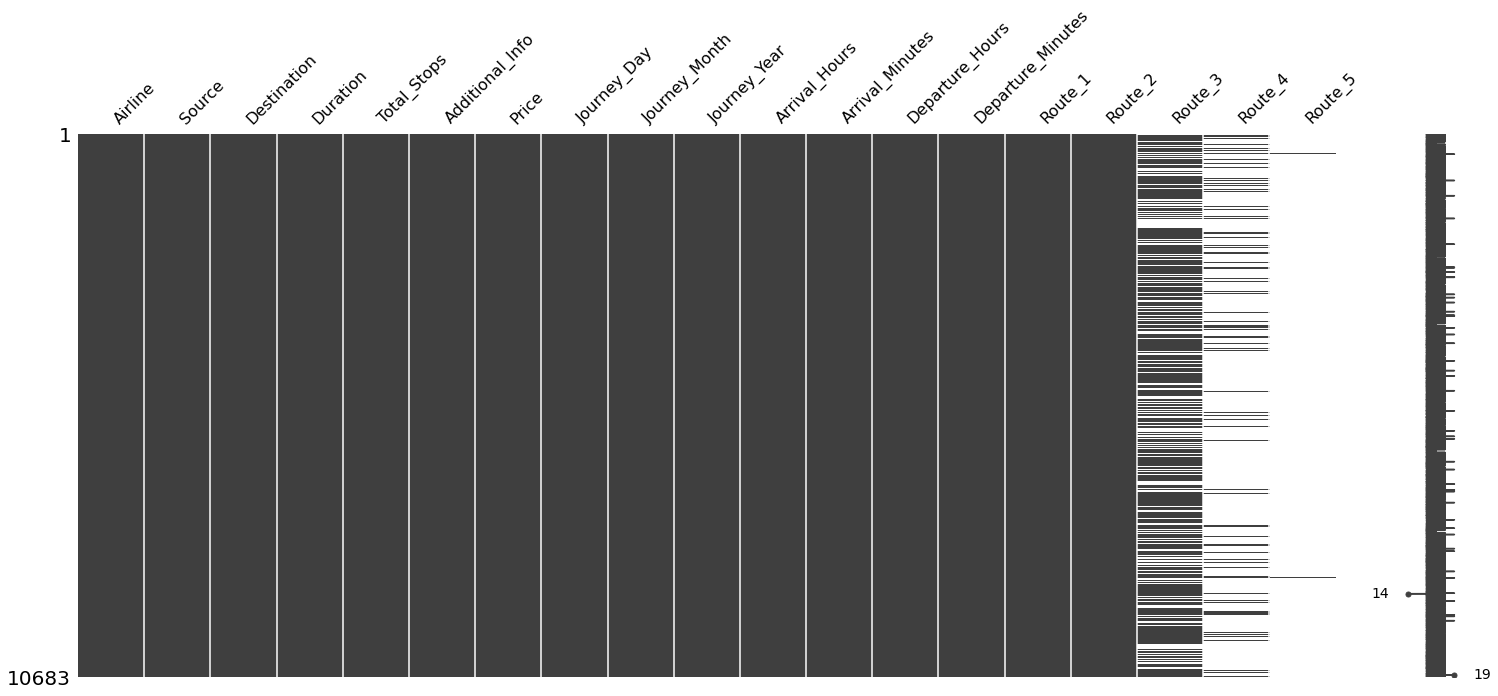

In [51]:
msn.matrix(train_df)

In [52]:
#Change mean to median
train_df.Price.fillna(train_df.Price.mean(),inplace=True)

In [53]:
train_df[train_df.Price.isnull()]

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Arrival_Hours,Arrival_Minutes,Departure_Hours,Departure_Minutes,Route_1,Route_2,Route_3,Route_4,Route_5


<AxesSubplot:>

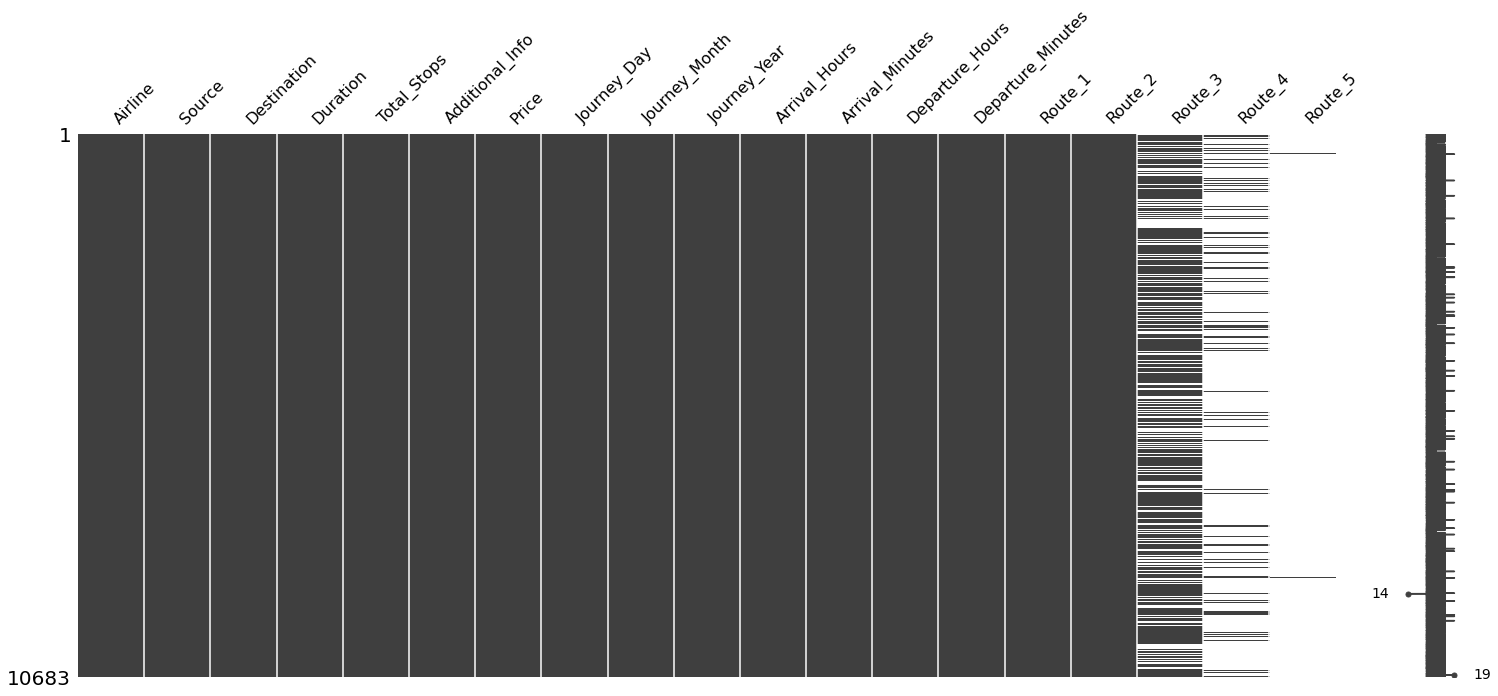

In [54]:
msn.matrix(train_df)

In [55]:
train_df.Route_1.fillna('None',inplace=True)
train_df.Route_2.fillna('None',inplace=True)
train_df.Route_3.fillna('None',inplace=True)
train_df.Route_4.fillna('None',inplace=True)
train_df.Route_5.fillna('None',inplace=True)

<AxesSubplot:>

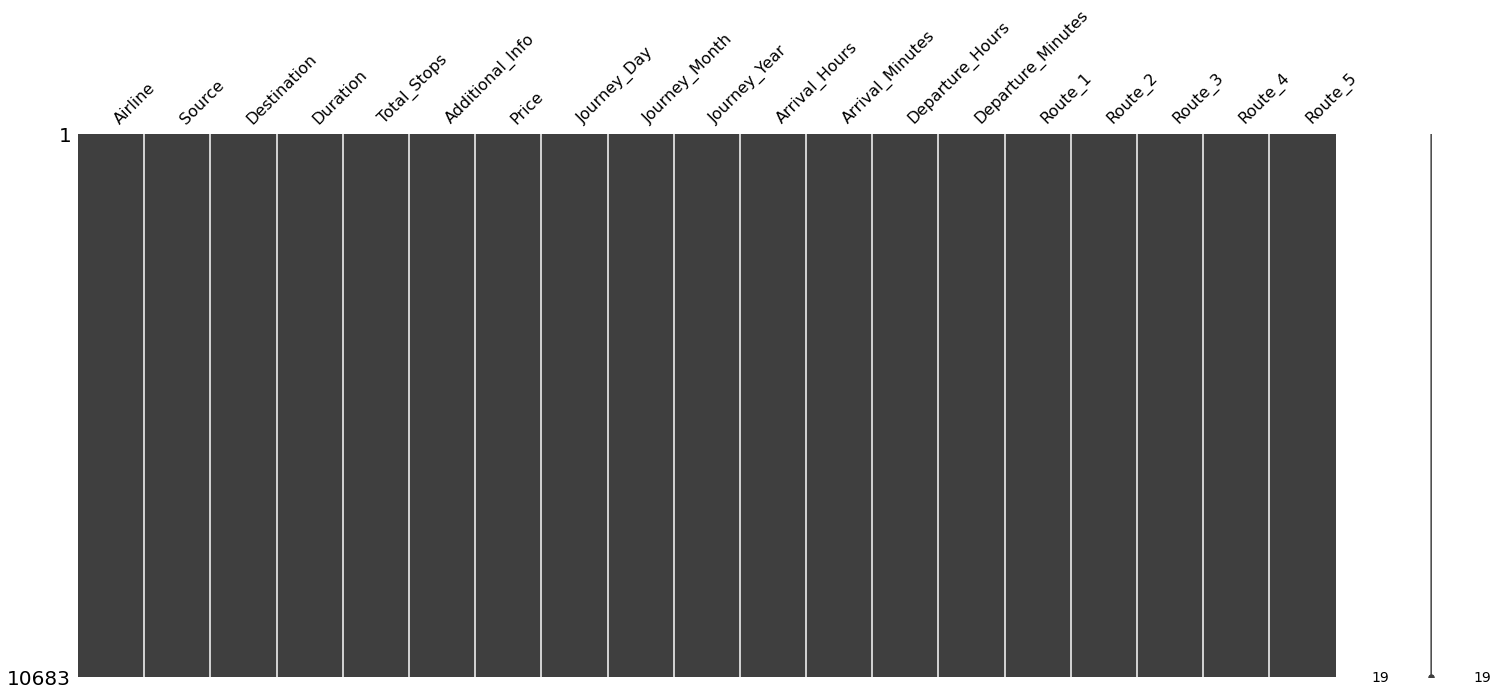

In [56]:
msn.matrix(train_df)

In [57]:
train_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Arrival_Hours,Arrival_Minutes,Departure_Hours,Departure_Minutes,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,2h 50m,0 stop,No info,3897,24,3,2019,1,10,22,20,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,19h,2 stops,No info,13882,9,6,2019,4,25,9,25,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,No info,6218,12,5,2019,23,30,18,5,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,No info,13302,1,3,2019,21,35,16,50,BLR,NAG,DEL,None,None


In [58]:
train_df.shape

(10683, 19)

In [59]:
train_df.columns

Index(['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_Day', 'Journey_Month',
       'Journey_Year', 'Arrival_Hours', 'Arrival_Minutes', 'Departure_Hours',
       'Departure_Minutes', 'Route_1', 'Route_2', 'Route_3', 'Route_4',
       'Route_5'],
      dtype='object')

In [60]:
train_df['Duration_hours'] = train_df.Duration.str.split('h').str[0]

In [61]:
train_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Arrival_Hours,Arrival_Minutes,Departure_Hours,Departure_Minutes,Route_1,Route_2,Route_3,Route_4,Route_5,Duration_hours
0,IndiGo,Banglore,New Delhi,2h 50m,0 stop,No info,3897,24,3,2019,1,10,22,20,BLR,DEL,None,None,None,2
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50,CCU,IXR,BBI,BLR,None,7
2,Jet Airways,Delhi,Cochin,19h,2 stops,No info,13882,9,6,2019,4,25,9,25,DEL,LKO,BOM,COK,None,19
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,No info,6218,12,5,2019,23,30,18,5,CCU,NAG,BLR,None,None,5
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,No info,13302,1,3,2019,21,35,16,50,BLR,NAG,DEL,None,None,4


In [62]:
train_df['Duration_minutes'] = train_df.Duration_hours.str.split('m').str[0]

In [63]:
train_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,...,Arrival_Minutes,Departure_Hours,Departure_Minutes,Route_1,Route_2,Route_3,Route_4,Route_5,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,2h 50m,0 stop,No info,3897,24,3,2019,...,10,22,20,BLR,DEL,None,None,None,2,2
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,1,5,2019,...,15,5,50,CCU,IXR,BBI,BLR,None,7,7
2,Jet Airways,Delhi,Cochin,19h,2 stops,No info,13882,9,6,2019,...,25,9,25,DEL,LKO,BOM,COK,None,19,19
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,No info,6218,12,5,2019,...,30,18,5,CCU,NAG,BLR,None,None,5,5
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,No info,13302,1,3,2019,...,35,16,50,BLR,NAG,DEL,None,None,4,4


In [64]:
train_df[train_df.Duration_hours=='5m']

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,...,Arrival_Minutes,Departure_Hours,Departure_Minutes,Route_1,Route_2,Route_3,Route_4,Route_5,Duration_hours,Duration_minutes
6474,Air India,Mumbai,Hyderabad,5m,2 stops,No info,17327,6,3,2019,...,55,16,50,BOM,GOI,PNQ,HYD,None,5m,5


In [65]:
train_df.Duration_hours.replace("5m","0",inplace=True)
#As there is only such value,I replaced the value manually.

In [66]:
train_df[train_df.Duration_minutes.isnull()]

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,...,Arrival_Minutes,Departure_Hours,Departure_Minutes,Route_1,Route_2,Route_3,Route_4,Route_5,Duration_hours,Duration_minutes


In [67]:
train_df.Duration_minutes.replace("","0",inplace=True)

In [68]:
train_df[train_df.Duration_minutes.isnull()]

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,...,Arrival_Minutes,Departure_Hours,Departure_Minutes,Route_1,Route_2,Route_3,Route_4,Route_5,Duration_hours,Duration_minutes


In [69]:
train_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,...,Arrival_Minutes,Departure_Hours,Departure_Minutes,Route_1,Route_2,Route_3,Route_4,Route_5,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,2h 50m,0 stop,No info,3897,24,3,2019,...,10,22,20,BLR,DEL,None,None,None,2,2
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,1,5,2019,...,15,5,50,CCU,IXR,BBI,BLR,None,7,7
2,Jet Airways,Delhi,Cochin,19h,2 stops,No info,13882,9,6,2019,...,25,9,25,DEL,LKO,BOM,COK,None,19,19
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,No info,6218,12,5,2019,...,30,18,5,CCU,NAG,BLR,None,None,5,5
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,No info,13302,1,3,2019,...,35,16,50,BLR,NAG,DEL,None,None,4,4


In [70]:
train_df.dtypes

Airline              object
Source               object
Destination          object
Duration             object
Total_Stops          object
Additional_Info      object
Price                 int64
Journey_Day           int32
Journey_Month         int32
Journey_Year          int32
Arrival_Hours         int32
Arrival_Minutes       int32
Departure_Hours       int32
Departure_Minutes     int32
Route_1              object
Route_2              object
Route_3              object
Route_4              object
Route_5              object
Duration_hours       object
Duration_minutes     object
dtype: object

In [71]:
train_df.Duration_hours.unique()

array(['2', '7', '19', '5', '4', '15', '21', '25', '13', '12', '26', '22',
       '23', '20', '10', '6', '11', '8', '16', '3', '27', '1', '14', '9',
       '18', '17', '24', '30', '28', '29', '37', '34', '38', '35', '36',
       '47', '33', '32', '31', '42', '39', '0', '41', '40'], dtype=object)

In [72]:
train_df.Duration_hours = train_df.Duration_hours.astype(int)
train_df.Duration_minutes = train_df.Departure_Minutes.astype(int)

In [73]:
train_df.drop(['Duration'],axis=1,inplace=True)

In [74]:
train_df.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Price', 'Journey_Day', 'Journey_Month', 'Journey_Year',
       'Arrival_Hours', 'Arrival_Minutes', 'Departure_Hours',
       'Departure_Minutes', 'Route_1', 'Route_2', 'Route_3', 'Route_4',
       'Route_5', 'Duration_hours', 'Duration_minutes'],
      dtype='object')

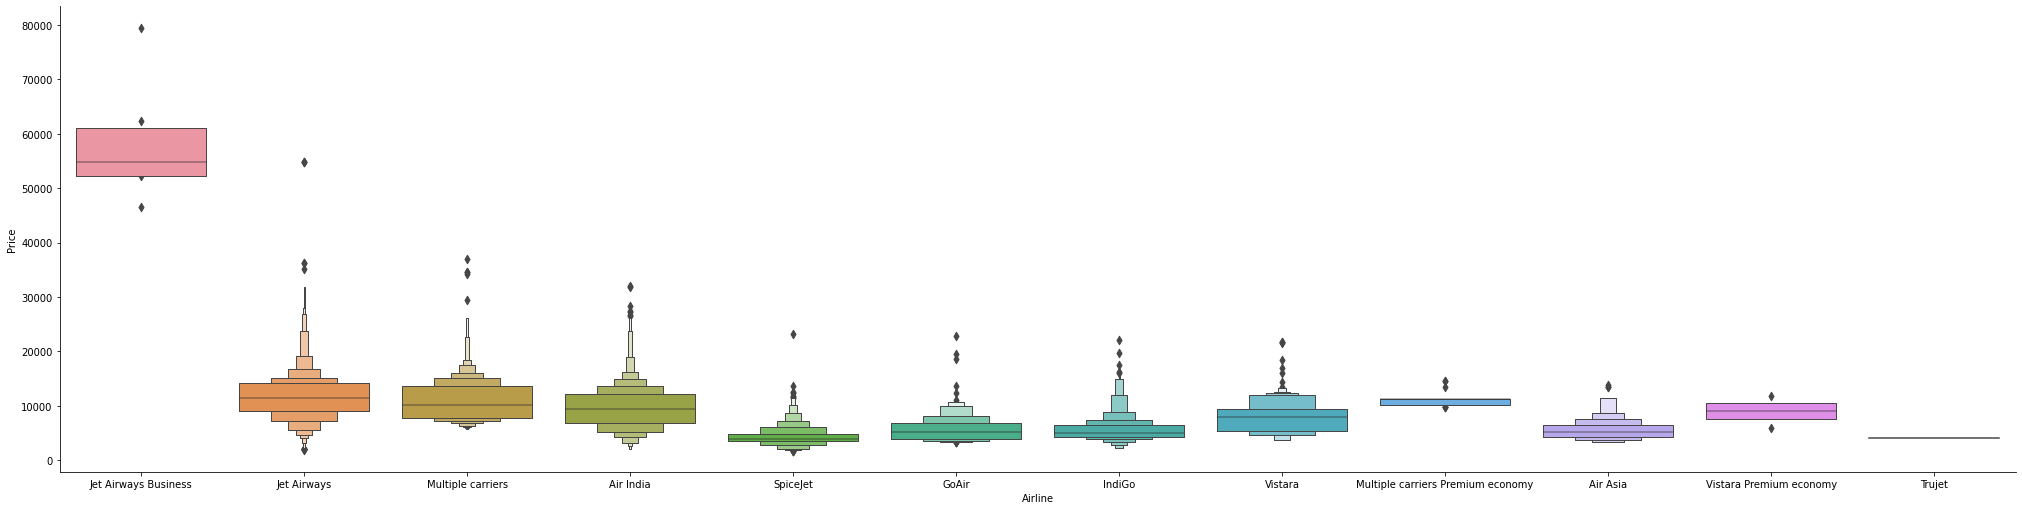

In [75]:
sns.catplot(y = "Price",  x= 'Airline', data=train_df.sort_values("Price",ascending=False),kind="boxen", height=7, aspect=4)

In [76]:
train_df.dtypes

Airline              object
Source               object
Destination          object
Total_Stops          object
Additional_Info      object
Price                 int64
Journey_Day           int32
Journey_Month         int32
Journey_Year          int32
Arrival_Hours         int32
Arrival_Minutes       int32
Departure_Hours       int32
Departure_Minutes     int32
Route_1              object
Route_2              object
Route_3              object
Route_4              object
Route_5              object
Duration_hours        int32
Duration_minutes      int32
dtype: object

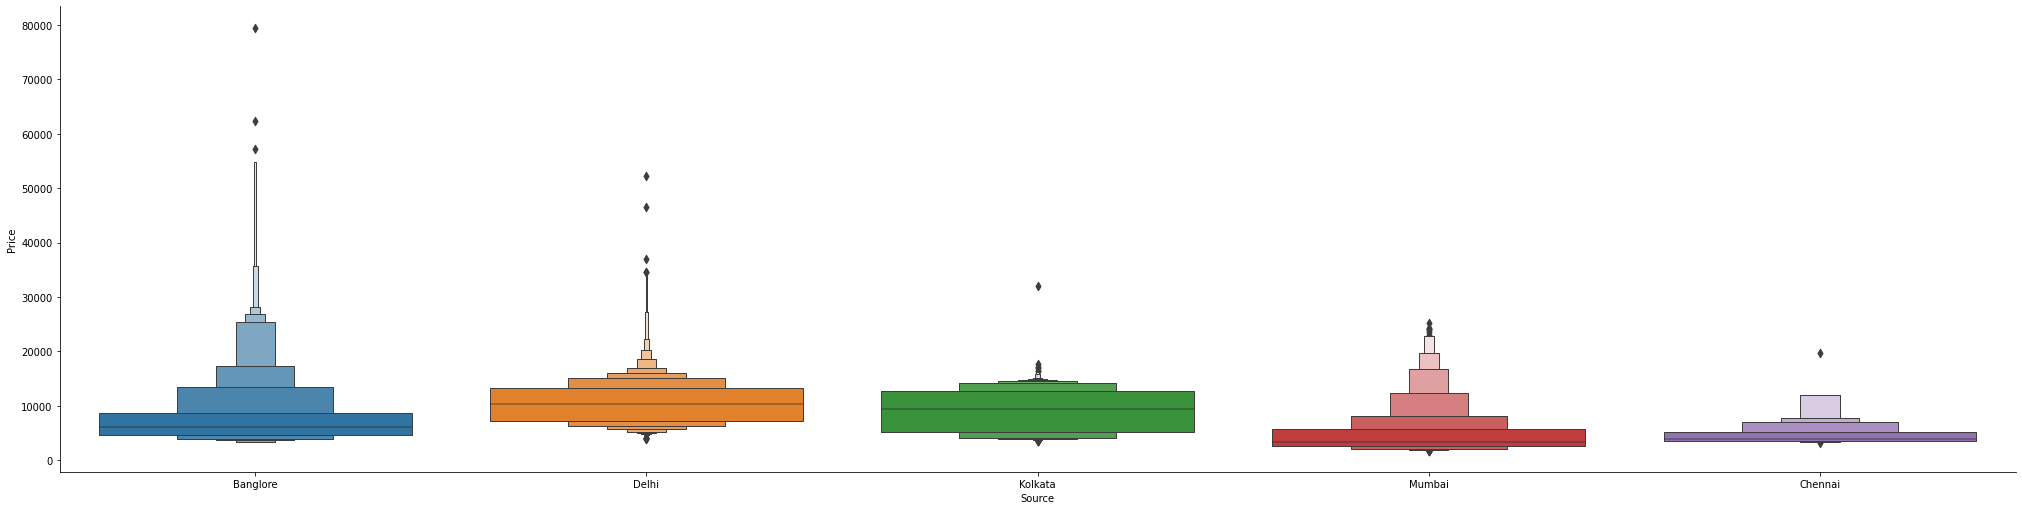

In [77]:
sns.catplot(y = "Price",  x= 'Source', data=train_df.sort_values("Price",ascending=False),kind="boxen", height=7, aspect=4)

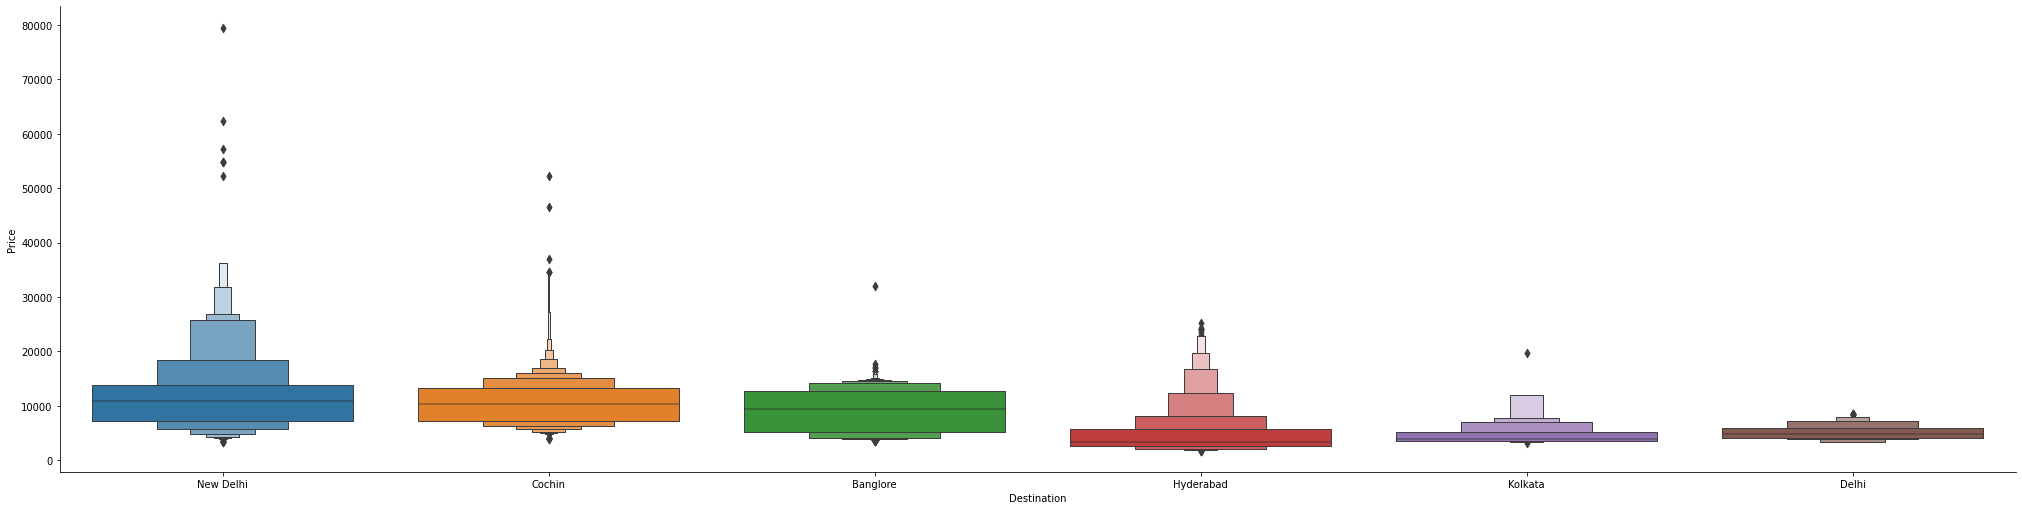

In [78]:
sns.catplot(y = "Price",  x= 'Destination', data=train_df.sort_values("Price",ascending=False),kind="boxen", height=7, aspect=4)

In [79]:
len(train_df[(train_df.Additional_Info == 'No info') | (train_df.Additional_Info == 'No Info')].index)/len(train_df) *100
# More than 75% of the data has no informatio so we are deleting the column

78.14284377047646

In [80]:
train_df.drop(['Additional_Info','Route_1','Route_2','Route_3','Route_4','Route_5'],axis=1,inplace=True)

In [81]:
train_df.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price',
       'Journey_Day', 'Journey_Month', 'Journey_Year', 'Arrival_Hours',
       'Arrival_Minutes', 'Departure_Hours', 'Departure_Minutes',
       'Duration_hours', 'Duration_minutes'],
      dtype='object')

In [82]:
train_df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Year,Arrival_Hours,Arrival_Minutes,Departure_Hours,Departure_Minutes,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,0 stop,3897,24,3,2019,1,10,22,20,2,20
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,2019,13,15,5,50,7,50
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,2019,4,25,9,25,19,25
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,2019,23,30,18,5,5,5
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,2019,21,35,16,50,4,50


In [83]:
train_df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Year,Arrival_Hours,Arrival_Minutes,Departure_Hours,Departure_Minutes,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,0 stop,3897,24,3,2019,1,10,22,20,2,20
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,2019,13,15,5,50,7,50
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,2019,4,25,9,25,19,25
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,2019,23,30,18,5,5,5
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,2019,21,35,16,50,4,50


In [84]:
train_df.dtypes

Airline              object
Source               object
Destination          object
Total_Stops          object
Price                 int64
Journey_Day           int32
Journey_Month         int32
Journey_Year          int32
Arrival_Hours         int32
Arrival_Minutes       int32
Departure_Hours       int32
Departure_Minutes     int32
Duration_hours        int32
Duration_minutes      int32
dtype: object

In [85]:
train_df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Year,Arrival_Hours,Arrival_Minutes,Departure_Hours,Departure_Minutes,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,0 stop,3897,24,3,2019,1,10,22,20,2,20
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,2019,13,15,5,50,7,50
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,2019,4,25,9,25,19,25
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,2019,23,30,18,5,5,5
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,2019,21,35,16,50,4,50


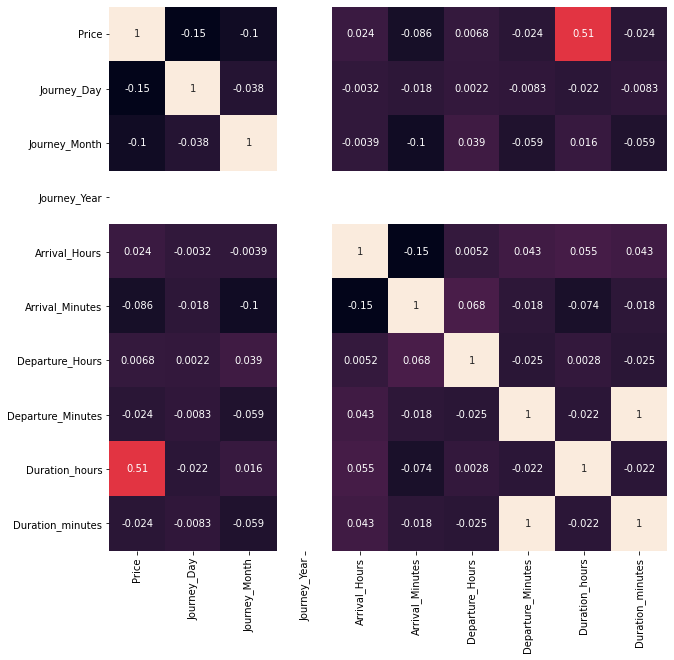

In [86]:
plt.figure(figsize=(10,10))
sns.heatmap(train_df.corr(), annot=True, cbar=False)
plt.show()

In [87]:
train_df.drop(['Journey_Year'], axis=1, inplace=True)

## Feature Engineering for Test Data

In [88]:
test_df = pd.read_excel('Test_set.xlsx')

In [89]:
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [90]:
test_df.shape

(2671, 10)

In [91]:
test_df['Journey_Day'] = test_df.Date_of_Journey.str.split('/').str[0]
test_df['Journey_Month'] = test_df.Date_of_Journey.str.split('/').str[1]
test_df['Journey_Year'] = test_df.Date_of_Journey.str.split('/').str[2]

In [92]:
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Journey_Year
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,06,2019
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,05,2019
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,05,2019
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,05,2019
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,06,2019


In [93]:
test_df.drop(columns='Date_of_Journey',axis=1,inplace=True)

In [94]:
test_df.dtypes

Airline            object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Journey_Day        object
Journey_Month      object
Journey_Year       object
dtype: object

In [95]:
test_df.Journey_Day = test_df.Journey_Day.astype('int')
test_df.Journey_Month = test_df.Journey_Month.astype('int')
test_df.Journey_Year = test_df.Journey_Year.astype('int')

In [96]:
test_df.Arrival_Time = test_df.Arrival_Time.str.split(' ').str[0]

In [97]:
test_df[test_df.Total_Stops.isnull()]

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Journey_Year


In [98]:
len(test_df[test_df.Total_Stops == 'non-stop'])

849

In [99]:
test_df.Total_Stops = test_df.Total_Stops.replace('non-stop','0 stop')

In [100]:
test_df['Arrival_Hours'] = test_df.Arrival_Time.str.split(':').str[0]
test_df['Arrival_Minutes'] = test_df.Arrival_Time.str.split(':').str[1]

In [101]:
test_df.Arrival_Hours = test_df.Arrival_Hours.astype(int)
test_df.Arrival_Minutes = test_df.Arrival_Minutes.astype(int)

In [102]:
test_df.drop(['Arrival_Time'],axis=1,inplace=True)

In [103]:
test_df['Departure_Hours'] = test_df.Dep_Time.str.split(':').str[0]
test_df['Departure_Minutes'] = test_df.Dep_Time.str.split(':').str[1]
test_df.Departure_Hours = test_df.Departure_Hours.astype(int)
test_df.Departure_Minutes = test_df.Departure_Minutes.astype(int)
test_df.drop(['Dep_Time'],axis=1,inplace=True)

In [104]:
test_df.drop(['Additional_Info',"Route"],axis=1,inplace=True)

<AxesSubplot:>

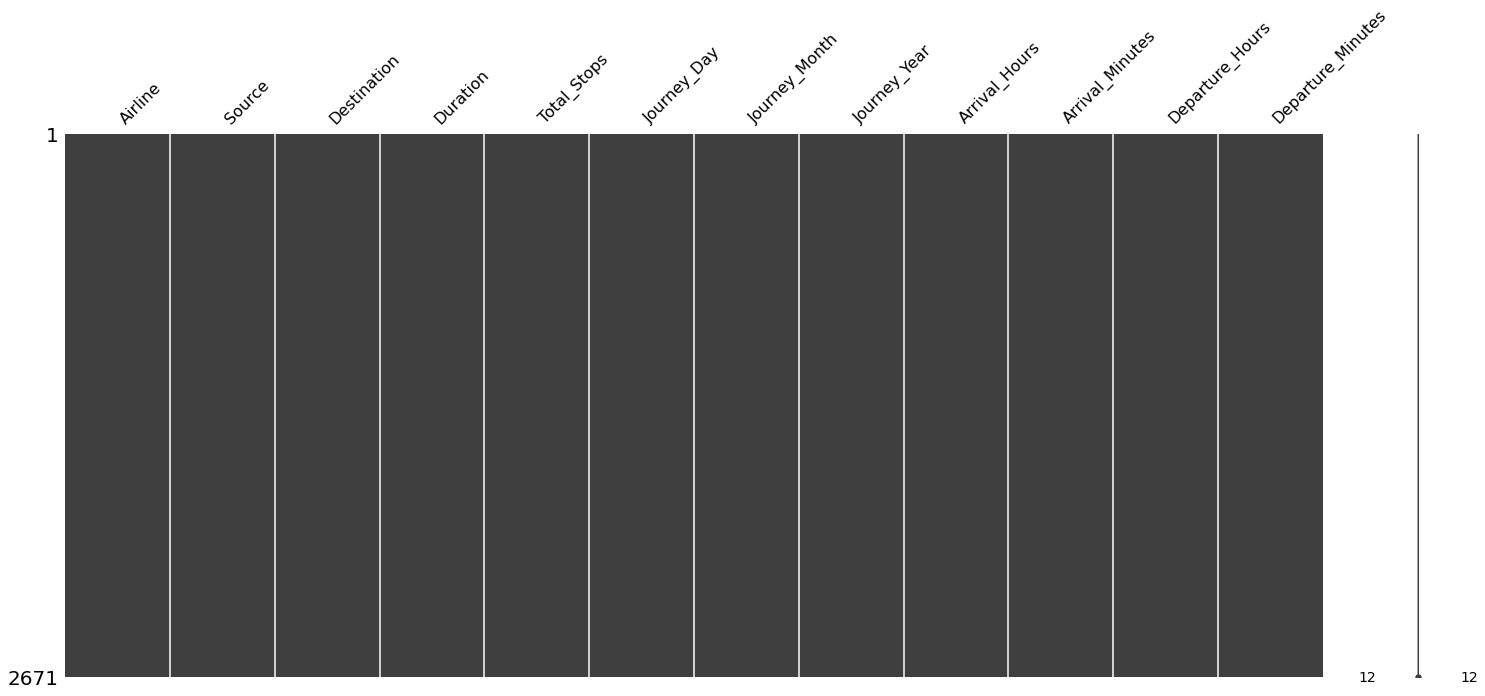

In [105]:
msn.matrix(test_df)

In [106]:
test_df['Duration_hours'] = test_df.Duration.str.split('h').str[0]

In [107]:
test_df['Duration_minutes'] = test_df.Duration_hours.str.split('m').str[0]

In [108]:
test_df.Duration_hours.unique()

array(['10', '4', '23', '13', '2', '18', '15', '5', '6', '28', '9', '17',
       '12', '14', '11', '25', '19', '7', '3', '1', '27', '26', '8', '21',
       '16', '22', '33', '24', '38', '20', '35', '31', '34', '29', '30',
       '37', '36', '39', '32', '40', '5m'], dtype=object)

In [109]:
test_df[test_df.Duration_hours=='5m']

,Airline,Source,Destination,Duration,Total_Stops,Journey_Day,Journey_Month,Journey_Year,Arrival_Hours,Arrival_Minutes,Departure_Hours,Departure_Minutes,Duration_hours,Duration_minutes
2660,Air India,Mumbai,Hyderabad,5m,2 stops,12,3,2019,16,55,16,50,5m,5


In [110]:
test_df.Duration_hours.replace("5m","0",inplace=True)
#As there is only such value,I replaced the value manually.

In [111]:
test_df[test_df.Duration_minutes.isnull()]

,Airline,Source,Destination,Duration,Total_Stops,Journey_Day,Journey_Month,Journey_Year,Arrival_Hours,Arrival_Minutes,Departure_Hours,Departure_Minutes,Duration_hours,Duration_minutes


In [112]:
test_df.Duration_minutes.replace("","0",inplace=True)

In [113]:
test_df[test_df.Duration_minutes.isnull()]

,Airline,Source,Destination,Duration,Total_Stops,Journey_Day,Journey_Month,Journey_Year,Arrival_Hours,Arrival_Minutes,Departure_Hours,Departure_Minutes,Duration_hours,Duration_minutes


In [114]:
test_df.Duration_hours = test_df.Duration_hours.astype(int)
test_df.Duration_minutes = test_df.Departure_Minutes.astype(int)

In [115]:
test_df.drop(['Duration'],axis=1,inplace=True)

In [116]:
test_df.drop(['Journey_Year'], axis=1, inplace=True)

## Encoding the features


In [117]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_df.Total_Stops = label_encoder.fit_transform(train_df.Total_Stops)
test_df.Total_Stops = label_encoder.transform(test_df.Total_Stops)


In [118]:
train_Airline = train_df[["Airline"]]

train_Airline = pd.get_dummies(train_Airline, drop_first=True)

train_Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [119]:
test_Airline = test_df[["Airline"]]

test_Airline = pd.get_dummies(test_Airline, drop_first=True)

test_Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [120]:
train_Source = train_df[["Source"]]

train_Source = pd.get_dummies(train_Source)

train_Source.head()

,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,1,0,0,0,0


In [121]:
test_Source = test_df[["Source"]]

test_Source = pd.get_dummies(test_Source)

test_Source.head()

,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,1,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,1,0,0
4,1,0,0,0,0


In [122]:
train_Destination = train_df[["Destination"]]

train_Destination = pd.get_dummies(train_Destination)

train_Destination.head()

,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,0,1
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,0,1


In [123]:
test_Destination = test_df[["Destination"]]

test_Destination = pd.get_dummies(test_Destination)
test_Destination.head()

,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,1,0,0,0,0
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,0,1,0,0,0


In [124]:
train_df.drop(['Airline','Source','Destination'],axis=1,inplace=True)
train_df = pd.concat([train_df, train_Airline, train_Source, train_Destination],axis=1)

In [125]:
test_df.drop(['Airline','Source','Destination'],axis=1,inplace=True)
test_df = pd.concat([test_df, test_Airline, test_Source, test_Destination],axis=1)

In [160]:
len(train_df.columns)

31

In [161]:
len(test_df.columns)

29

In [158]:
train_df.drop(['Destination_New Delhi'], axis=1,inplace=True)

In [159]:
test_df.drop(['Destination_New Delhi'], axis=1,inplace=True)

In [162]:
print(train_df.columns)
print('--'*10)
print(test_df.columns)

Index(['Total_Stops', 'Price', 'Journey_Day', 'Journey_Month', 'Arrival_Hours',
       'Arrival_Minutes', 'Departure_Hours', 'Departure_Minutes',
       'Duration_hours', 'Duration_minutes', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata'],
      dtype='object')
--------------------
Index(['Total_Stops', 'Journey_Day', 'Journey_Month', 'Arrival_Hours',
       'Arrival_Minutes', 'Departure_Hours', 'Departure_Minutes',
       'Duration_hours', 'Duration_minutes', 'Airline_Air India',
       'Airline_GoAir', 'Airline_

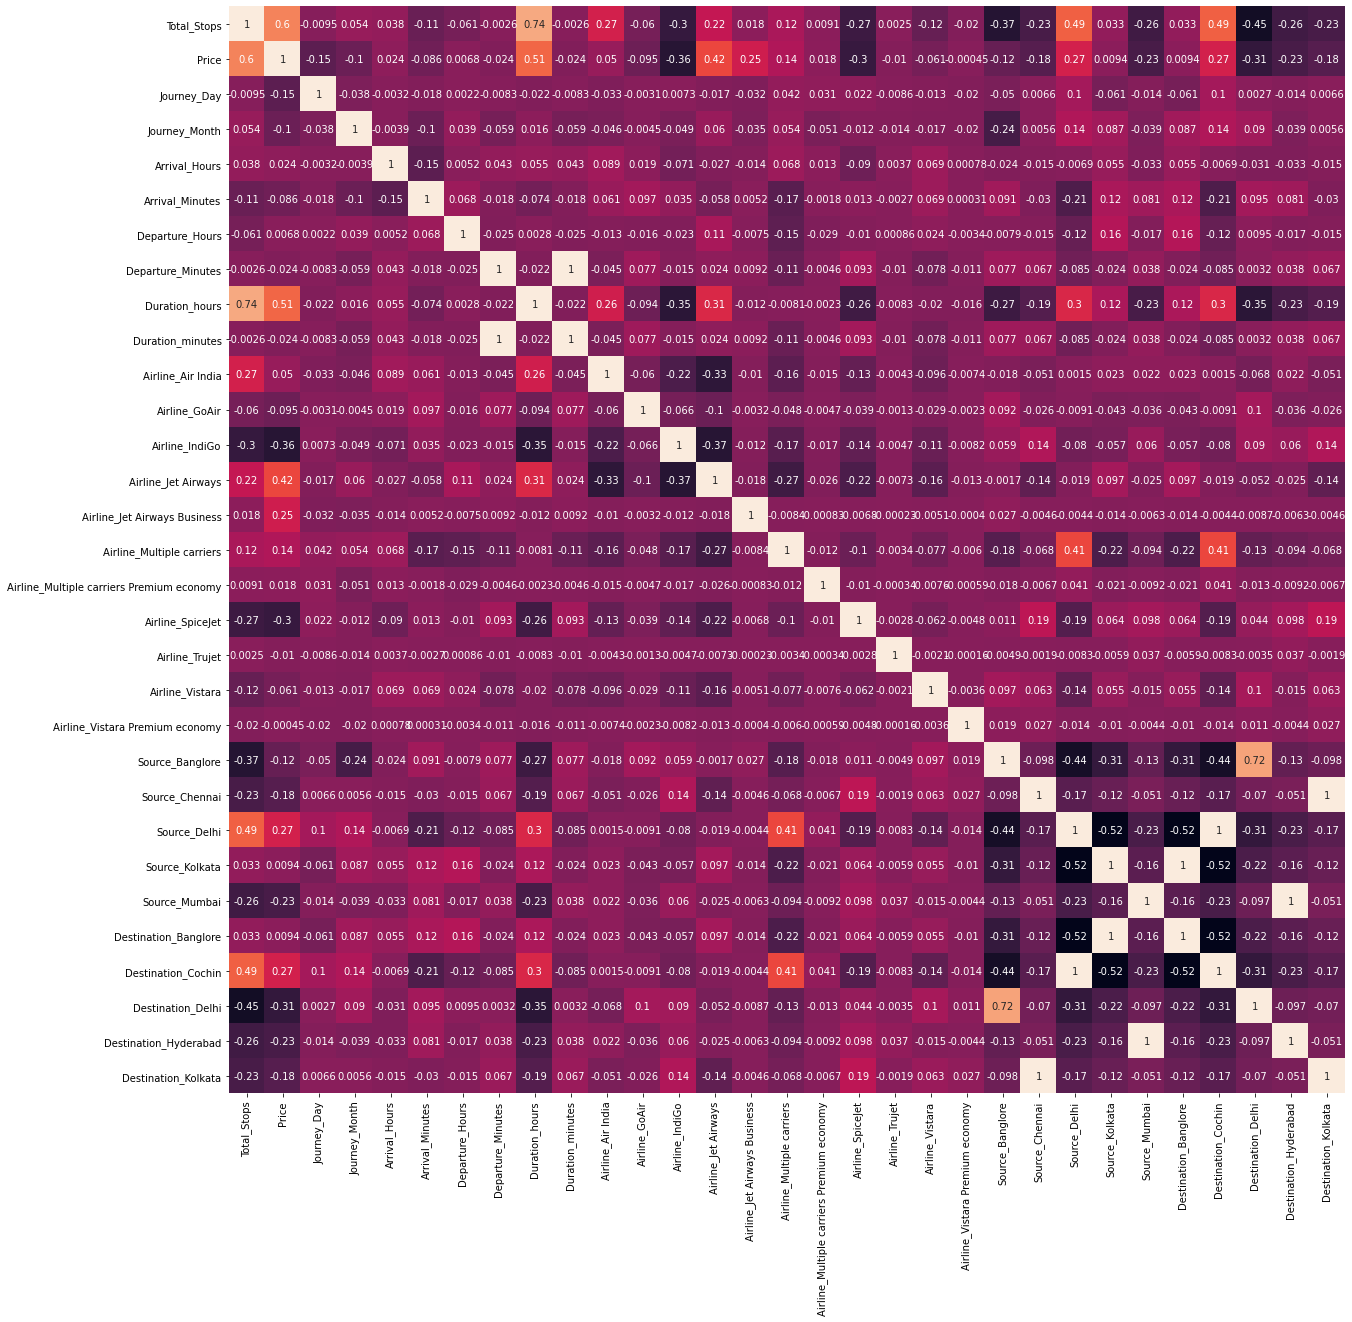

In [163]:
plt.figure(figsize=(20,20))
sns.heatmap(train_df.corr(),annot=True,cbar=False)
plt.show()

## Feature Selection

In [164]:
X = train_df.drop(['Price'],axis=1)
Y = train_df.Price

In [165]:
print(X.shape)
print(Y.shape)

(10683, 30)
(10683,)


## Splitting

In [166]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size =0.3,random_state=0)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7478, 30)
(7478,)
(3205, 30)
(3205,)


In [167]:
#Important features using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [168]:
extra = ExtraTreesRegressor()
extra.fit(X,Y)

ExtraTreesRegressor()

In [169]:
extra.feature_importances_

array([2.37196150e-01, 1.42540082e-01, 5.68954979e-02, 2.85941444e-02,
       2.28805674e-02, 2.57264567e-02, 1.64790136e-02, 1.01832116e-01,
       1.55074698e-02, 9.77732108e-03, 1.97915619e-03, 1.69834729e-02,
       1.45876467e-01, 6.76735625e-02, 2.19762143e-02, 8.97984100e-04,
       4.99103605e-03, 8.67771984e-05, 4.67126194e-03, 7.74907821e-05,
       1.83344880e-02, 7.12804192e-04, 9.33382934e-03, 2.74190246e-03,
       6.88638383e-03, 2.81170294e-03, 1.24604916e-02, 1.50069401e-02,
       8.43814308e-03, 6.31072833e-04])

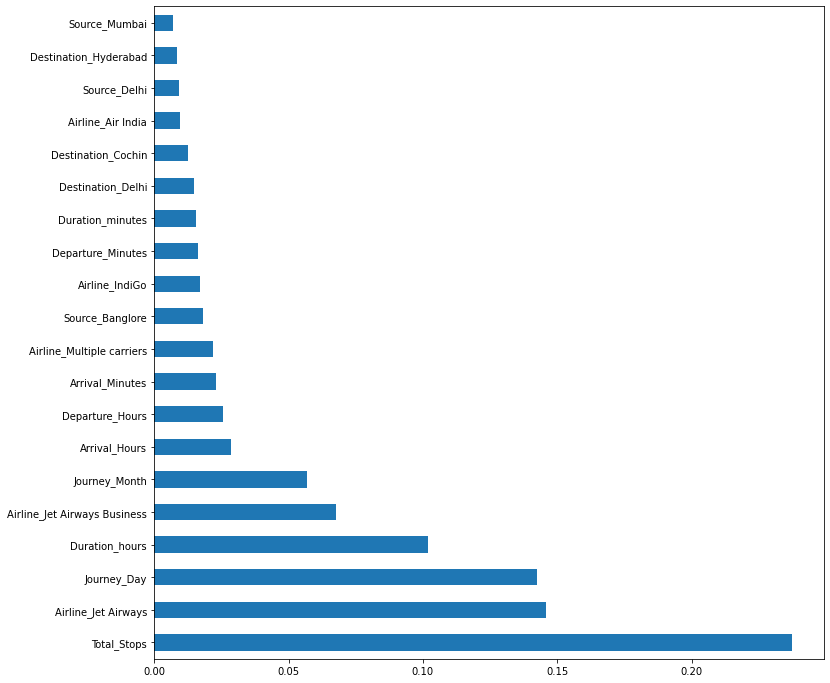

In [170]:
plt.figure(figsize=(12,12))
feature_importances = pd.Series(extra.feature_importances_, index= X.columns)
feature_importances.nlargest(20).plot(kind='barh')
plt.show()

## Random Forest

In [171]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor()
random_forest_reg.fit(x_train,y_train)

RandomForestRegressor()

In [175]:
y_pred = random_forest_reg.predict(x_test)

In [176]:
random_forest_reg.score(x_train, y_train)

0.9570109231442647

In [177]:
random_forest_reg.score(x_test, y_test)

0.8138488005084838

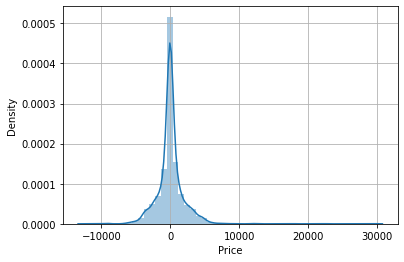

In [178]:
sns.distplot(y_test-y_pred)
plt.grid()

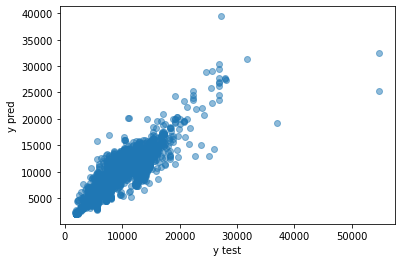

In [179]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("y test")
plt.ylabel("y pred")
plt.show()

In [180]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

print(f"MAE - {mean_absolute_error(y_test,y_pred)}")
print(f"MSE - {mean_squared_error(y_test,y_pred)}")
print(f"RMSE - {sqrt(mean_squared_error(y_test,y_pred))}")
print(f"R-squared value - {r2_score(y_test,y_pred)}")

MAE - 1164.9606812515617
MSE - 3770762.5661286917
RMSE - 1941.8451447344332
R-squared value - 0.8138488005084838


## Hyperparameter Tuning

In [181]:
from sklearn.model_selection import RandomizedSearchCV

In [182]:
#No of trees
n_estimators = [int(x) for x in np.linspace(start=100, stop=1300, num=13)]

#Number of features to consider at every split
max_features = ['auto','sqrt','log2']

#Maximum no.of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num=7)]

#minimum no.of samples required to split a node
min_samples_split = [2,5,10,15,100]

#minimum no.of samples required at each leaf node
min_samples_leaf = [1,2,5,10]

In [183]:
random_grid = {
                'n_estimators' : n_estimators,
                 'max_features' : max_features,
                 'max_depth':max_depth,
                 'min_samples_leaf' : min_samples_leaf,
                 'min_samples_split' : min_samples_split
                }

In [184]:
random_rf = RandomizedSearchCV(RandomForestRegressor(), param_distributions=random_grid, scoring='neg_mean_squared_error',n_iter=10,cv=5, verbose= 2 ,random_state=12)

In [185]:
random_rf.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1100, min_samples_split=15, min_samples_leaf=2, max_features=log2, max_depth=9 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1100, min_samples_split=15, min_samples_leaf=2, max_features=log2, max_depth=9, total=   2.3s
[CV] n_estimators=1100, min_samples_split=15, min_samples_leaf=2, max_features=log2, max_depth=9 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


[CV]  n_estimators=1100, min_samples_split=15, min_samples_leaf=2, max_features=log2, max_depth=9, total=   2.4s
[CV] n_estimators=1100, min_samples_split=15, min_samples_leaf=2, max_features=log2, max_depth=9 
[CV]  n_estimators=1100, min_samples_split=15, min_samples_leaf=2, max_features=log2, max_depth=9, total=   2.3s
[CV] n_estimators=1100, min_samples_split=15, min_samples_leaf=2, max_features=log2, max_depth=9 
[CV]  n_estimators=1100, min_samples_split=15, min_samples_leaf=2, max_features=log2, max_depth=9, total=   2.3s
[CV] n_estimators=1100, min_samples_split=15, min_samples_leaf=2, max_features=log2, max_depth=9 
[CV]  n_estimators=1100, min_samples_split=15, min_samples_leaf=2, max_features=log2, max_depth=9, total=   2.3s
[CV] n_estimators=1100, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=21 
[CV]  n_estimators=1100, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=21, total=   8.7s
[CV] n_estimators=1100, min_samples_split

[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=2, max_features=log2, max_depth=21, total=   2.7s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=2, max_features=log2, max_depth=21 
[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=2, max_features=log2, max_depth=21, total=   2.6s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=2, max_features=log2, max_depth=21 
[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=2, max_features=log2, max_depth=21, total=   2.7s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=2, max_features=log2, max_depth=21 
[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=2, max_features=log2, max_depth=21, total=   2.6s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=2, max_features=log2, max_depth=21 
[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=2, max_features=log2, max_depth=21, total=   2.7s
[CV] n_estimators=700, min_samples_split=5, min_samp

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.8min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 9, 13, 17, 21, 25, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300]},
                   random_state=12, scoring='neg_mean_squared_error',
                   verbose=2)

In [186]:
random_rf.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 25}

In [187]:
random_rf.best_score_

-3980603.739578078

In [188]:
prediction_y = random_rf.predict(x_test)

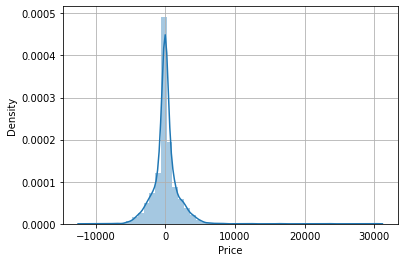

In [189]:
sns.distplot(y_test-prediction_y)
plt.grid()

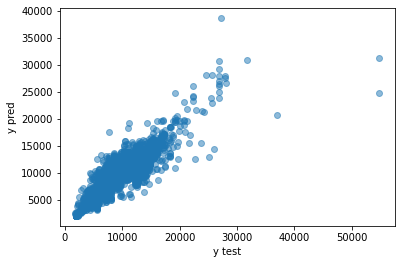

In [190]:
plt.scatter(y_test,prediction_y, alpha=0.5)
plt.xlabel("y test")
plt.ylabel("y pred")
plt.show()

In [191]:
print(f"MAE - {mean_absolute_error(y_test,prediction_y)}")
print(f"MSE - {mean_squared_error(y_test,prediction_y)}")
print(f"RMSE - {sqrt(mean_squared_error(y_test,prediction_y))}")
print(f"R-squared value - {r2_score(y_test,prediction_y)}")

MAE - 1138.7206049842036
MSE - 3518040.0743686347
RMSE - 1875.643909266531
R-squared value - 0.8263249493390157


## Saving the model

In [192]:
import pickle

In [193]:
model_file = open('final_rf.pkl','wb')
pickle.dump(random_rf, model_file)
model_file.close()

In [157]:
# Just a check!
# model = open('flight_price_predictions_random_forest.pkl', 'rb')
# forest = pickle.load(model)
# p = forest.predict(x_test)
# r2_score(y_test,p)

# XGBoost

In [261]:
import xgboost as xgb

In [262]:
xgb_regressor = xgb.XGBRegressor()
xgb_regressor.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [263]:
xgb_regressor.score(x_train,y_train)

0.9391007270478238

In [264]:
xgb_regressor.score(x_test, y_test)

0.8142390506830272

In [265]:
y_pred = xgb_regressor.predict(x_test)

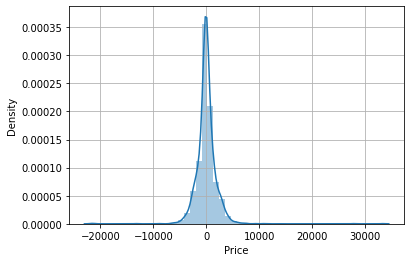

In [266]:
sns.distplot(y_test-y_pred)
plt.grid()

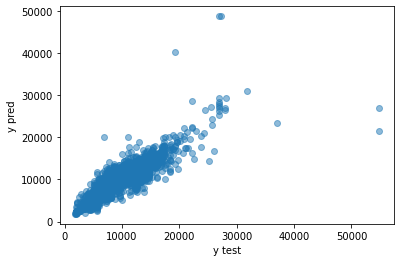

In [267]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("y test")
plt.ylabel("y pred")
plt.show()

In [270]:
print(f"MAE - {mean_absolute_error(y_test,y_pred)}")
print(f"MSE - {mean_squared_error(y_test,y_pred)}")
print(f"RMSE - {sqrt(mean_squared_error(y_test,y_pred))}")
print(f"R-squared value - {r2_score(y_test,y_pred)}")

MAE - 1175.1470647136432
MSE - 3762857.482768431
RMSE - 1939.808620139737
R-squared value - 0.8142390506830272


## Hyperparameter Tuning

In [272]:
from sklearn.model_selection import RandomizedSearchCV

In [274]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Various learning rate parameters
learning_rate = ['0.05','0.1', '0.2','0.3','0.5','0.6']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
#Subssample parameter values
subsample=[0.7,0.6,0.8]
# Minimum child weight parameters
min_child_weight=[3,4,5,6,7]



In [275]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'subsample': subsample,
               'min_child_weight': min_child_weight}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'learning_rate': ['0.05', '0.1', '0.2', '0.3', '0.5', '0.6'], 'max_depth': [5, 10, 15, 20, 25, 30], 'subsample': [0.7, 0.6, 0.8], 'min_child_weight': [3, 4, 5, 6, 7]}


In [277]:
xg_random = RandomizedSearchCV(xgb.XGBRegressor(), param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [278]:
xg_random.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, total=   4.3s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.2s remaining:    0.0s


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, total=   4.4s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, total=   4.3s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, total=   4.3s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, total=   4.3s
[CV] subsample=0.7, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.3, total=   4.5s
[CV] subsample=0.7, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.3 
[CV]  su

[CV]  subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.3, total=   3.1s
[CV] subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.3, total=   3.2s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.2 
[CV]  subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.2, total=   1.3s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.2 
[CV]  subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.2, total=   1.3s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.2 
[CV]  subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.2, total=   1.2s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.2 
[CV]  subsample

[CV]  subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3, total=   5.6s
[CV] subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3, total=   5.6s
[CV] subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3, total=   5.6s
[CV] subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3, total=   5.9s
[CV] subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3, total=   5.6s
[CV] subsample=0.8, n_estimators=500, min_child_weight=3, max_depth=10, learning_rate=0.3 
[CV]  subsample

[CV]  subsample=0.8, n_estimators=300, min_child_weight=4, max_depth=30, learning_rate=0.1, total=   3.1s
[CV] subsample=0.8, n_estimators=300, min_child_weight=4, max_depth=30, learning_rate=0.1 
[CV]  subsample=0.8, n_estimators=300, min_child_weight=4, max_depth=30, learning_rate=0.1, total=   3.2s
[CV] subsample=0.8, n_estimators=300, min_child_weight=4, max_depth=30, learning_rate=0.1 
[CV]  subsample=0.8, n_estimators=300, min_child_weight=4, max_depth=30, learning_rate=0.1, total=   3.2s
[CV] subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=20, learning_rate=0.3 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=20, learning_rate=0.3, total=   1.9s
[CV] subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=20, learning_rate=0.3 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=20, learning_rate=0.3, total=   1.8s
[CV] subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=20, learning_rate=0.3 
[CV]  subsample

[CV]  subsample=0.7, n_estimators=1200, min_child_weight=6, max_depth=5, learning_rate=0.1, total=   1.6s
[CV] subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05, total=   0.5s
[CV] subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05, total=   0.5s
[CV] subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05, total=   0.5s
[CV] subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05, total=   0.5s
[CV] subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05 
[CV]  

[CV]  subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05, total=   1.5s
[CV] subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05 
[CV]  subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05, total=   1.4s
[CV] subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05 
[CV]  subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05, total=   1.5s
[CV] subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05 
[CV]  subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05, total=   1.5s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=30, learning_rate=0.05 
[CV]  subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=30, learning_rate=0.05, total=  16.6s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=30, learning_rate=0.05 
[C

[CV]  subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.1, total=   5.5s
[CV] subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.1 
[CV]  subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.1, total=   5.6s
[CV] subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6, total=   0.7s
[CV] subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6, total=   0.7s
[CV] subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6, total=   0.7s
[CV] subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6 
[CV]  subsample

[CV]  subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3, total=   2.5s
[CV] subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3, total=   2.6s
[CV] subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3, total=   2.6s
[CV] subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3, total=   2.5s
[CV] subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3, total=   2.5s
[CV] subsample=0.6, n_estimators=600, min_child_weight=4, max_depth=25, learning_rate=0.2 
[CV]  subsample

[CV]  subsample=0.7, n_estimators=100, min_child_weight=3, max_depth=5, learning_rate=0.3, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=3, max_depth=5, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=3, max_depth=5, learning_rate=0.3, total=   0.1s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.5 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.5, total=   0.3s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.5 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.5, total=   0.3s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.5 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.5, total=   0.3s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.5 
[CV]  subsample=0.7, n_es

[CV]  subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2, total=   0.9s
[CV] subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2 
[CV]  subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2, total=   1.0s
[CV] subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2 
[CV]  subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2, total=   1.0s
[CV] subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2 
[CV]  subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2, total=   0.9s
[CV] subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2 
[CV]  subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2, total=   0.9s
[CV] subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=30, learning_rate=0.6 
[CV]  subsample=0.7, n_e

[CV]  subsample=0.8, n_estimators=1100, min_child_weight=5, max_depth=25, learning_rate=0.6, total=  11.1s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=5, max_depth=25, learning_rate=0.6 
[CV]  subsample=0.8, n_estimators=1100, min_child_weight=5, max_depth=25, learning_rate=0.6, total=  10.9s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=5, max_depth=25, learning_rate=0.6 
[CV]  subsample=0.8, n_estimators=1100, min_child_weight=5, max_depth=25, learning_rate=0.6, total=  10.9s
[CV] subsample=0.8, n_estimators=800, min_child_weight=5, max_depth=20, learning_rate=0.2 
[CV]  subsample=0.8, n_estimators=800, min_child_weight=5, max_depth=20, learning_rate=0.2, total=   7.5s
[CV] subsample=0.8, n_estimators=800, min_child_weight=5, max_depth=20, learning_rate=0.2 
[CV]  subsample=0.8, n_estimators=800, min_child_weight=5, max_depth=20, learning_rate=0.2, total=   7.5s
[CV] subsample=0.8, n_estimators=800, min_child_weight=5, max_depth=20, learning_rate=0.2 
[CV]  subs

[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.2, total=   2.4s
[CV] subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3, total=   3.6s
[CV] subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3, total=   3.6s
[CV] subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3, total=   3.5s
[CV] subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3, total=   3.5s
[CV] subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3 
[CV]  subsample

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 35.7min finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          validate_parameters=None,
                                          verbosity=None),
                   n_iter=100, n_jobs=1,
                   par

In [279]:
xg_random.best_params_

{'subsample': 0.6,
 'n_estimators': 1100,
 'min_child_weight': 3,
 'max_depth': 5,
 'learning_rate': '0.05'}

In [280]:
xg_random.best_score_

-3528859.1696084305

In [281]:
predictions=xg_random.predict(x_test)

<AxesSubplot:xlabel='Price', ylabel='Density'>

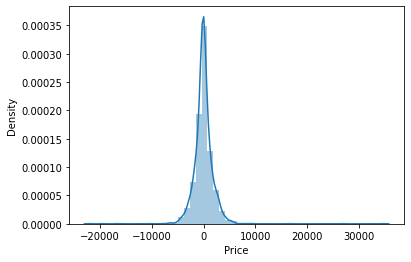

In [282]:
sns.distplot(y_test-predictions)

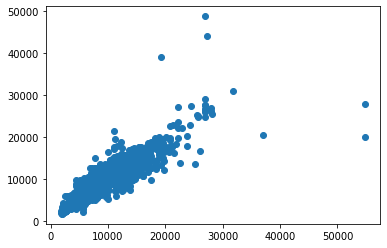

In [283]:
plt.scatter(y_test,predictions)

In [284]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1178.1852155140894
MSE: 3713743.6181878257
RMSE: 1927.1075782601827


In [286]:
import pickle
# open a file, where you ant to store the data
file = open('xgboostRegressor.pkl', 'wb')

# dump information to that file
pickle.dump(xg_random, file)